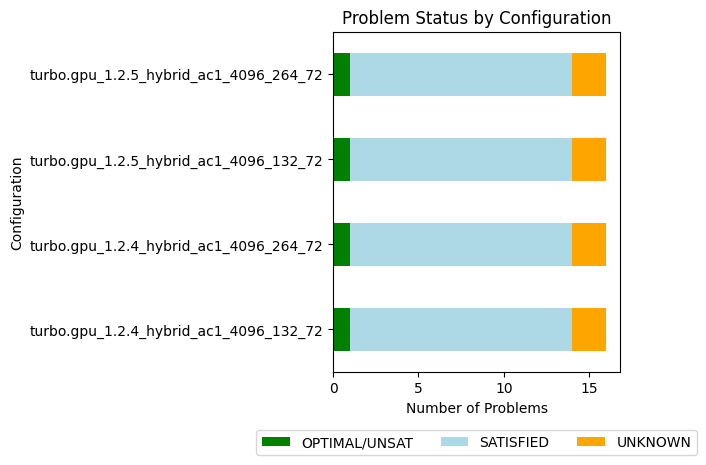

,uid,version,machine,short_uid,avg_nodes_per_second,median_nodes_per_second,avg_normalized_nodes_per_second,best_nodes_per_second,avg_deductions_per_node,median_deductions_per_node,avg_normalized_deductions_per_node,median_normalized_deductions_per_node,best_deductions_per_node,avg_deductions_per_second,median_deductions_per_second,avg_normalized_deductions_per_second,median_normalized_deductions_per_second,best_deductions_per_second,avg_fp_iterations_per_second,median_fp_iterations_per_second,avg_normalized_fp_iterations_per_second,best_fp_iterations_per_second,avg_fp_iterations,median_fp_iterations,avg_normalized_fp_iterations,best_fp_iterations,avg_propagator_mem_mb,median_propagator_mem_mb,avg_normalized_propagator_mem_mb,best_propagator_mem_mb,avg_store_mem_kb,avg_normalized_store_mem_kb,best_store_mem_kb,median_store_mem_kb,problem_optimal,problem_sat,problem_unknown,problem_with_store_shared,problem_with_props_shared,idle_eps_workers
1,turbo.gpu.release_1.2.4_helios_300s_hybrid_ac1_4096_264_72,1.2.4,helios,turbo.gpu_1.2.4_hybrid_ac1_4096_264_72,97325.650249,32372.650194,0.0,0,1.0,1.0,0.0,0.0,16,97325.650249,32372.650194,0.0,0.0,16,3.409140e+06,831031.042465,0.0,0,43.741124,25.175539,0.0,16,0.854890,0.422844,0.0,16,403.0155,0.0,16,208.2,1,13,2,3,0,3
3,turbo.gpu.release_1.2.5_helios_300s_hybrid_ac1_4096_264_72,1.2.5,helios,turbo.gpu_1.2.5_hybrid_ac1_4096_264_72,94111.367669,32453.568380,0.0,0,1.0,1.0,0.0,0.0,16,94111.367669,32453.568380,0.0,0.0,16,3.175947e+06,847653.489606,0.0,0,43.714292,25.152048,0.0,16,0.854363,0.422844,0.0,16,402.7520,0.0,16,208.2,1,13,2,3,0,3
0,turbo.gpu.release_1.2.4_helios_300s_hybrid_ac1_4096_132_72,1.2.4,helios,turbo.gpu_1.2.4_hybrid_ac1_4096_132_72,84441.046867,24539.056818,0.0,0,1.0,1.0,0.0,0.0,16,84441.046867,24539.056818,0.0,0.0,16,2.792244e+06,532424.721524,0.0,0,43.179211,26.052394,0.0,16,0.854890,0.422844,0.0,16,403.0155,0.0,16,208.2,1,13,2,3,0,3
2,turbo.gpu.release_1.2.5_helios_300s_hybrid_ac1_4096_132_72,1.2.5,helios,turbo.gpu_1.2.5_hybrid_ac1_4096_132_72,80590.147997,24332.887573,0.0,0,1.0,1.0,0.0,0.0,16,80590.147997,24332.887573,0.0,0.0,16,2.591380e+06,528451.518795,0.0,0,43.042948,26.030298,0.0,16,0.854363,0.422844,0.0,16,402.7520,0.0,16,208.2,1,13,2,3,0,3


| short_uid                              |   avg_nodes_per_second |   problem_optimal |   problem_sat |   problem_unknown |
|:---------------------------------------|-----------------------:|------------------:|--------------:|------------------:|
| turbo.gpu_1.2.4_hybrid_ac1_4096_264_72 |                97325.7 |                 1 |            13 |                 2 |
| turbo.gpu_1.2.5_hybrid_ac1_4096_264_72 |                94111.4 |                 1 |            13 |                 2 |
| turbo.gpu_1.2.4_hybrid_ac1_4096_132_72 |                84441   |                 1 |            13 |                 2 |
| turbo.gpu_1.2.5_hybrid_ac1_4096_132_72 |                80590.1 |                 1 |            13 |                 2 |


IndexError: index 0 is out of bounds for axis 0 with size 0

/home/ptalbot/repositories/lattice-land/bench/pybench/lib/python3.12/site-packages/matplotlib/_tight_bbox.py:67: RuntimeWarning: divide by zero encountered in scalar divide
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/home/ptalbot/repositories/lattice-land/bench/pybench/lib/python3.12/site-packages/matplotlib/_tight_bbox.py:68: RuntimeWarning: divide by zero encountered in scalar divide
  fig.bbox.width / w1, fig.bbox.height / h1)
/home/ptalbot/repositories/lattice-land/bench/pybench/lib/python3.12/site-packages/matplotlib/patches.py:797: RuntimeWarning: invalid value encountered in scalar add
  y1 = self.convert_yunits(self._y0 + self._height)
/home/ptalbot/repositories/lattice-land/bench/pybench/lib/python3.12/site-packages/matplotlib/transforms.py:2036: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty


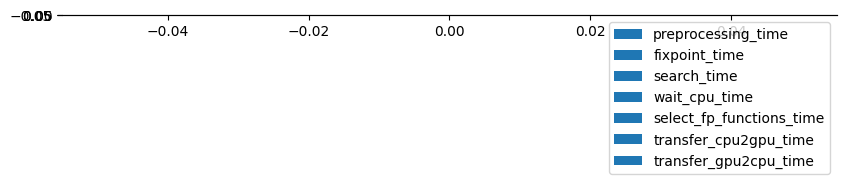

In [ ]:
import importlib
import analysis
from IPython.display import HTML, display
import pandas as pd

importlib.reload(analysis)

pd.options.mode.copy_on_write = True

df = analysis.read_experiments([
  # "../campaign/precision5820/com.google.ortools.sat-v9.9.csv",
  # "../campaign/precision5820/com.google.ortools.sat.noglobal-v9.9.csv",
  # "../campaign/precision5820/com.google.ortools.sat-v9.9-par.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15-java11.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15-par-java11.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15-par.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.1.7-A5000.csv",
  # "../campaign/precision5820/turbo.cpu.release-v1.2.0.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.0.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.1.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.2.csv",
  "../campaign/precision5820/turbo.gpu.release-v1.2.3.csv",
  "../campaign/precision5820/turbo.gpu.release-v1.2.4.csv",
  "../campaign/precision5820/turbo.gpu.release-v1.2.5.csv"
  # "../campaign/helios/turbo.gpu.release-v1.2.2.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.3.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.4.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.5.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.3.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.4.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.5.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.6.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.7-mzn2024.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.8-mzn2024.csv",
  # "../campaign/aion/org.choco.choco-v4.10.18-mzn2024.csv",
  # "../campaign/aion/com.google.ortools.sat-v9.9.csv"
  # "../campaign/iris/turbo.gpu.release-v1.2.4.csv",
  # "../campaign/precision7750/turbo.cpu.release-v1.2.6-analysis.csv"
  # "../campaign/aion/turbo.cpu.release-v1.2.7-mzn2024-analysis.csv"
  # "../campaign/precision7750/turbo.gpu.release-v1.2.7.csv"
  # "../campaign/precision5820/turbo.cpu.release-v1.2.4.csv"
])

# df.to_csv("test.csv", index=False)
# df = df[~(df['problem'] == "rcpsp")]
# df = df[df['problem'] == "rcpsp"]

# Because globalmem was only benchmarked on problems that could fit in shared memory.
# But we don't want to remove the others for most of the analysis. (comment the line if you want to analyse the globalmem results)
df = df[df['uid'] != "turbo.gpu.release_1.2.0_precision5820_300s_gpu_4096_64_globalmem"]
# df = df[df['uid'] != "turbo.gpu.release_1.2.7_helios_1200s_hybrid_wac1_4096_32768_132_72"]

# df = df[df['short_uid'] != "turbo.gpu_1.2.7_hybrid_ac1_32768_132_72_disable_simplify_ipc"]
# df = df[df['short_uid'] != "turbo.gpu_1.2.7_hybrid_ac1_32768_132_72_disable_simplify"]
# df = df[df['short_uid'] != "turbo.gpu_1.2.7_hybrid_ac1_32768_132_72_force_ternarize_ipc"]
# df = df[df['short_uid'] != "turbo.gpu_1.2.8_barebones_wac1_4096_32768_0_no_pr"]

# mzn_challenge = pd.read_csv("../benchmarking/mzn2024_noset.csv")
mzn_challenge = pd.read_csv("../benchmarking/short.csv")
mzn_challenge['model_data_file'] = mzn_challenge['model'] + ' - ' + mzn_challenge['data_file']
# print(mzn_challenge)
mzn_data = set(mzn_challenge['model_data_file'])
df = df[df['model_data_file'].isin(mzn_data)]

df = analysis.intersect(df)

# df = df[df['timeout_ms'] == 1200000]

# print(df[df['preprocessing_time'] >= 1200])

analysis.plot_overall_result(df)
# display(HTML(analysis.metrics_table(df[df['mzn_solver'].str.startswith("turbo")]).to_html()))
metrics = analysis.metrics_table(df)
display(HTML(metrics.to_html()))
# print(metrics[metrics['short_uid'] != "turbo.gpu_1.2.7_hybrid_wac1_4096_32768_264_72"][['short_uid', 'avg_nodes_per_second','median_nodes_per_second','avg_fp_iterations_per_second','median_fp_iterations_per_second', 'avg_propagator_mem_mb', 'median_propagator_mem_mb', 'avg_store_mem_kb', 'median_store_mem_kb', 'problem_with_store_shared', 'problem_with_props_shared']].T.to_latex(index=True))

sorted_metrics = metrics.sort_values(by=['problem_optimal', 'problem_sat', 'avg_nodes_per_second', 'version'], ascending=[False, False, False, True])
print(sorted_metrics[['short_uid','avg_nodes_per_second','problem_optimal', 'problem_sat', 'problem_unknown']].to_markdown(index=False))
# print(sorted_metrics[['short_uid','problem_optimal', 'problem_sat', 'problem_unknown']].to_latex(index=False))

analysis.plot_time_distribution("hybrid_ac1_4096_128_10_v1.2.5", df[df['uid'] == "turbo.gpu.release_1.2.5_precision5820_300s_hybrid_ac1_4096_128_10"])

analysis.comparison_table_md(df, "turbo.gpu.release_1.2.4_precision5820_300s_hybrid_ac1_4096_128_10", "turbo.gpu.release_1.2.5_precision5820_300s_hybrid_ac1_4096_128_10")
analysis.comparison_table_md(df, "turbo.gpu.release_1.2.4_precision5820_300s_gpu_ac1_4096_64", "turbo.gpu.release_1.2.5_precision5820_300s_gpu_ac1_4096_64")
# analysis.comparison_table_md(df, "turbo.gpu.release_1.2.8_helios_1200s_barebones_ac1_32768_0_no_pr", "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_0_32768_0_no_pr")

# print(analysis.list_problem_where_leq(df, "nodes", "turbo.gpu.release_1.2.0_precision5820_300s_4096_64_256", "turbo.gpu.release_1.2.1_precision5820_300s_4096_64_1024"))

# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_0_32768_0_no_pr", "turbo.gpu.release_1.2.8_helios_1200s_barebones_ac1_32768_0_no_pr", "TCN-WAC1-0-NO-PR", "TNC-AC1-NO-PR")

# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_0_32768_0_no_pr", "org.choco.choco_4.10.18_aion_1200s", "Turbo", "Choco")
# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_0_32768_0_no_pr", "com.google.ortools.sat_9.9_aion_1200s", "Turbo", "OR-Tools")
# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_0_32768_0_no_pr", "org.choco.choco_4.10.18_aion_1200s_free", "TCN-WAC1-0-NO-PR", "Choco (free)")
# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_0_32768_0_no_pr", "org.choco.choco_4.10.18_aion_1200s_64threads_64cores", "TCN-WAC1-0-NO-PR", "Choco (64 threads)")
# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_0_32768_0_no_pr", "com.google.ortools.sat_9.9_aion_1200s_64threads_64cores", "TCN-WAC1-0-NO-PR", "OR-Tools (64 threads)")


# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_4096_32768_0", "org.choco.choco_4.10.18_aion_1200s", "TCN", "Choco")
# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_4096_32768_0_no_pr", "org.choco.choco_4.10.18_aion_1200s", "TCN-WAC1-4096-NO-PR", "Choco")

# print(p[p['Comparison'] == 'Error'])
# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_4096_32768_0", "org.choco.choco_4.10.18_aion_1200s_free", "TCN1.2.8", "Choco (free)")
# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_4096_32768_0", "org.choco.choco_4.10.18_aion_1200s_64threads_64cores", "TCN1.2.8", "Choco (64 threads)")
# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.7_helios_1200s_hybrid_wac1_4096_32768_264_72", "org.choco.choco_4.10.18_aion_1200s_64threads_64cores")

# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_4096_32768_0", "com.google.ortools.sat_9.9_aion_1200s", "TCN1.2.8", "OR-Tools")
# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_4096_32768_0", "com.google.ortools.sat_9.9_aion_1200s_64threads_64cores", "TCN1.2.8", "OR-Tools (64 threads)")
# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.6_helios_1200s_hybrid_wac1_4096_32768_264_72", "turbo.gpu.release_1.2.6_helios_1200s_hybrid_wac1_4096_131072_264_72")
# print(p[p['Comparison'] == 'Error'])
# print(p[p['Comparison'] == 'turbo.gpu.release_1.2.5_precision5820_300s_hybrid_ac1_4096_128_10 better'])
